In [30]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import pandas as pd

In [31]:
def polypow3(co):
    '''input has to be tuple or list containing all coeffs L[0] = x³ to L[3] = x^0'''
    
    F = lambda x: co[0]*x**3 + co[1]*x**2 + co[2]*x + co[3]
    f = lambda x: 3*co[0]*x**2 + 2*co[1]*x + co[2]
    df1 = lambda x: 6*co[0]*x +2*co[1]

    x = np.linspace(-5, 10, 100)

    fig, axs = plt.subplots(1, 3, facecolor='0.2',figsize=(12, 4),sharey = True)
    
    axs[0].plot(x, F(x), c = 'black')
    axs[1].plot(x, f(x), c = 'black')
    axs[2].plot(x, df1(x),c ='black')
    axs[0].set_title("F(x) = {}x³+{}x²+{}x+{}".format(co[0],co[1],co[2],co[3]))
    axs[1].set_title("f(x) = {}x²+{}x+{}".format(3*co[0],2*co[1],co[2]))
    axs[2].set_title("df1(x) = {}x+{}".format(6*co[0],2*co[1]))

    for n in range(3):
        axs[n].set_facecolor('0.13')
        axs[n].axhline(y=0, c='white', lw=0.1,zorder=0)
        axs[n].axvline(x=0, c='white', lw=0.1,zorder=0)
    plt.show()
    


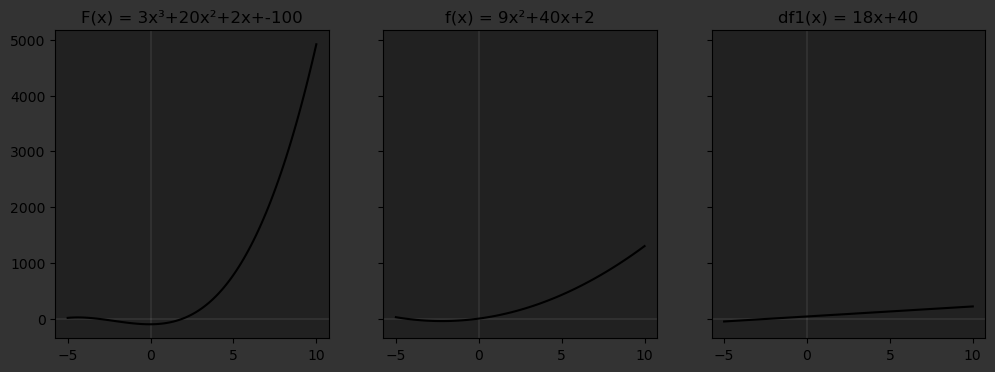

In [32]:
polypow3([3,20,2,-100])

In [33]:
def polypown(co):
    '''given a list of coeffs in ascending order L[0] = x^0 until L[n] = x^n
       this function will draw the graphes for the Function and the first two derivatives.'''
    create_polynomial = lambda coeffs: sum(coeffs[i]*x**i for i in range(len(coeffs)))
    x = sp.symbols('x')
    F = create_polynomial(co)
    f = sp.diff(F, x)
    df = sp.diff(sp.diff(F, x), x)
    F1 = sp.lambdify(x, F, 'numpy')
    f1 = sp.lambdify(x, f, 'numpy')
    df1 = sp.lambdify(x, df, 'numpy')
    x_ = np.linspace(-10, 10, 100)

    fig, axs = plt.subplots(1, 3, facecolor='0.2',figsize=(12, 4))
    
    axs[0].plot(x_, F1(x_), c = 'green')
    if len(co) == 3:
        axs[2].axhline(y=2*co[2],c='green')
        axs[1].plot(x_, f1(x_), c = 'green')
    elif len(co) == 2:
        axs[1].axhline(y=co[1],c='green')
    else:
        axs[1].plot(x_, f1(x_), c = 'green')
        axs[2].plot(x_, df1(x_),c ='green')
    axs[0].set_title("F(x) = {}".format(F), fontsize=9)
    axs[1].set_title("f(x) = {}".format(f), fontsize=9)
    axs[2].set_title("df1(x) = {}".format(df), fontsize=9)

    for n in range(3):
        axs[n].set_facecolor('black')
        axs[n].axhline(y=0, c='white', lw=0.1,zorder=0)
        axs[n].axvline(x=0, c='white', lw=0.1,zorder=0)
    plt.show()

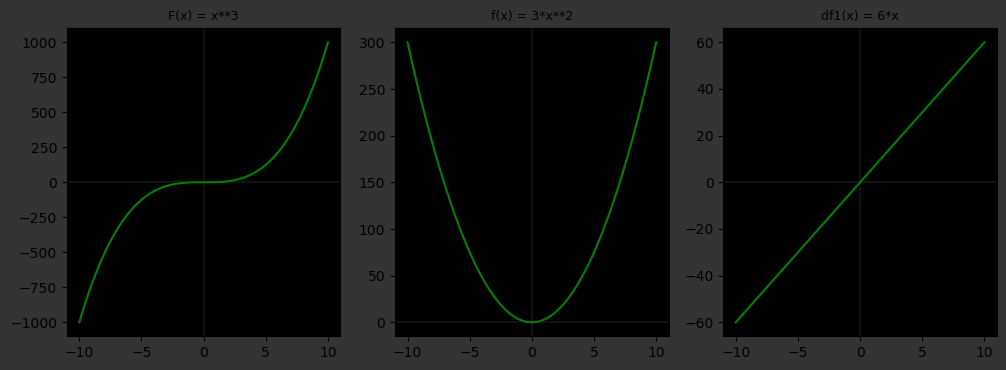

In [34]:
polypown([0,0,0,1])

In [35]:
class Calculus:
    def __init__(self,L):
        create_symfunc = lambda coeffs: sum(coeffs[i]*self.x**i for i in range(len(coeffs)))
        self.x = sp.symbols('x')
        self.sym_func = create_symfunc(L)
        self.sym_dfunc = sp.diff(self.sym_func, self.x)
        self.sym_ifunc = sp.integrate(self.sym_func, self.x)
        self.func = sp.lambdify(self.x, self.sym_func, 'numpy')
        self.dfunc = sp.lambdify(self.x, self.sym_dfunc, 'numpy')
        self.ifunc = sp.lambdify(self.x, self.sym_ifunc, 'numpy')
    
    def __repr__(self):
        return '{}'.format(self.sym_func)
        
    def show_func(self):
        return self.sym_func
    
    def calcx(self,v):
        return self.func(v)
    
    def value_table(self, start=-5, stop=5, step=1):
        d = pd.Series({round(k, 6): round(self.func(k), 7) for k in np.arange(start, stop, step)})
        return d  
    
    def value_table2(self, start=-5, stop=5, step=1):
        f = {round(k, 6): round(self.func(k), 7) for k in np.arange(start, stop, step)}
        d1 = {round(k, 6): round(self.dfunc(k), 7) for k in np.arange(start, stop, step)}
        i = {round(k, 6): round(self.ifunc(k), 7) for k in np.arange(start, stop, step)}
        df = pd.DataFrame({'{}'.format(self.sym_ifunc): i,'{}'.format(self.sym_func): f, '{}'.format(self.sym_dfunc): d1})
        return df
    
    def integrate(self,transform=False):
        if transform:
            self.a = sp.Poly(sp.integrate(self.sym_func, self.x)).coeffs()
            self.a.append(0)
            return Calculus(self.a[::-1])
        else:
            return sp.integrate(self.sym_func, self.x)
        
    def derivative(self,transform=False):
        if transform:
            self.a = sp.Poly(sp.diff(self.sym_func, self.x)).coeffs()
            return Calculus(self.a[::-1])
        else:
            return sp.diff(self.sym_func, self.x)
    
    def show_curve(self, coords=[-1, 1, -1, 4],size=(3,2)): #yes I really added markers to my lines lol
        xticks = list(range(coords[0]-1,coords[1]+1, 1))
        yticks = list(range(coords[2]-1,coords[3]+1, 1))
        y_ticks = len(xticks)
        x_ticks = len(yticks)
        x_ = np.linspace(coords[0], coords[1], 100)
        plt.figure(facecolor='0.3',figsize=size)
        plt.axes().set_facecolor('grey')
        plt.axis([coords[0],coords[1],coords[2],coords[3]])
        plt.plot(x_, self.func(x_),color='black')
        plt.axhline(y=0, color='k', lw=0.5,zorder=2)
        plt.axvline(x=0, color='k', lw=0.5,zorder=2)
        plt.scatter(xticks,np.zeros(y_ticks),color = 'black',zorder=2,marker='.', s=4)
        #plt.scatter(np.zeros(x_ticks), yticks,color = 'black',zorder=2,marker='.', s=4)
        plt.grid()
        plt.show()

In [36]:
def more_plot(L, shape, s=(10,8), sh=False):
    fig, axs = plt.subplots(shape[0], shape[1], facecolor='0.3',figsize=s, sharey=sh)
    for idx, val in enumerate(L):
        i = idx // shape[1]
        j = idx % shape[1]
        axs[i,j].set_facecolor('black')
        axs[i,j].plot(*L[idx], color='green')
        axs[i,j].grid(alpha=.3)
    plt.show()

def create_poly(L):
    instance = Calculus(L)
    return instance

def interval2(f, a, b):
    return (list(range(a, b)), [f(i) for i in range(a,b)])

interval = lambda f, a, b: (list(range(a, b)), [f(i) for i in range(a, b)])

In [37]:
func1 = Calculus([1,2,3])
i1 = interval(func1.calcx, 3, 8)
i1

([3, 4, 5, 6, 7], [34, 57, 86, 121, 162])

In [38]:
my_poly2 = [create_poly([10,1,2,i]) for i in range(9)]
my_poly2

[2*x**2 + x + 10,
 x**3 + 2*x**2 + x + 10,
 2*x**3 + 2*x**2 + x + 10,
 3*x**3 + 2*x**2 + x + 10,
 4*x**3 + 2*x**2 + x + 10,
 5*x**3 + 2*x**2 + x + 10,
 6*x**3 + 2*x**2 + x + 10,
 7*x**3 + 2*x**2 + x + 10,
 8*x**3 + 2*x**2 + x + 10]

In [39]:
intervals = [interval(i.calcx,4,12) for i in my_poly2]
intervals

[([4, 5, 6, 7, 8, 9, 10, 11], [46, 65, 88, 115, 146, 181, 220, 263]),
 ([4, 5, 6, 7, 8, 9, 10, 11], [110, 190, 304, 458, 658, 910, 1220, 1594]),
 ([4, 5, 6, 7, 8, 9, 10, 11], [174, 315, 520, 801, 1170, 1639, 2220, 2925]),
 ([4, 5, 6, 7, 8, 9, 10, 11], [238, 440, 736, 1144, 1682, 2368, 3220, 4256]),
 ([4, 5, 6, 7, 8, 9, 10, 11], [302, 565, 952, 1487, 2194, 3097, 4220, 5587]),
 ([4, 5, 6, 7, 8, 9, 10, 11], [366, 690, 1168, 1830, 2706, 3826, 5220, 6918]),
 ([4, 5, 6, 7, 8, 9, 10, 11], [430, 815, 1384, 2173, 3218, 4555, 6220, 8249]),
 ([4, 5, 6, 7, 8, 9, 10, 11], [494, 940, 1600, 2516, 3730, 5284, 7220, 9580]),
 ([4, 5, 6, 7, 8, 9, 10, 11],
  [558, 1065, 1816, 2859, 4242, 6013, 8220, 10911])]

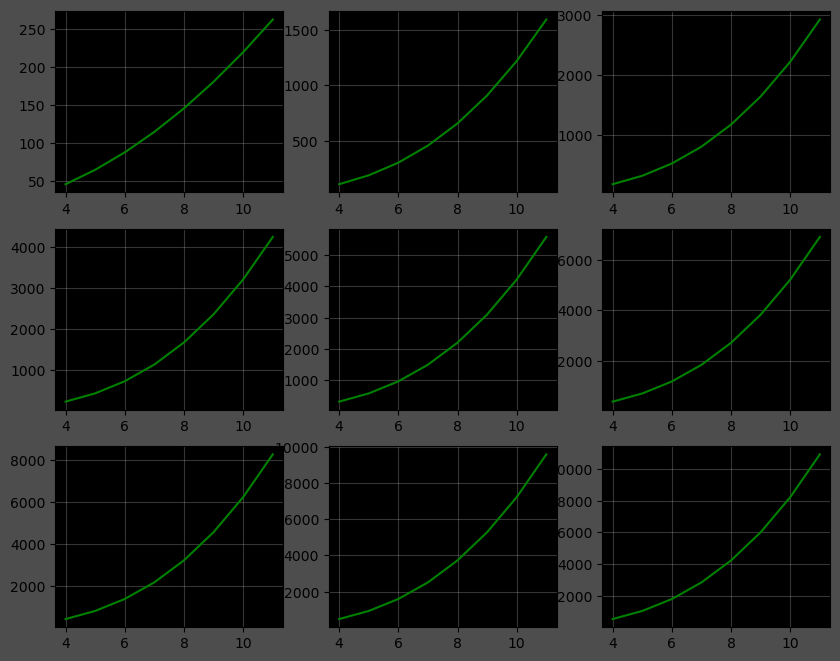

In [40]:
more_plot(intervals, shape=(3,3))

x + 10


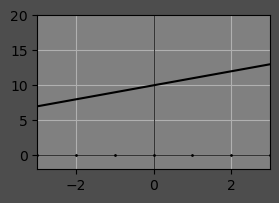

x**2 + x + 10


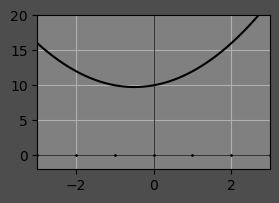

2*x**2 + x + 10


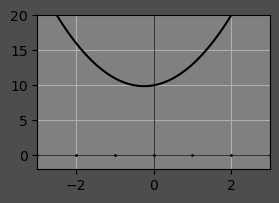

3*x**2 + x + 10


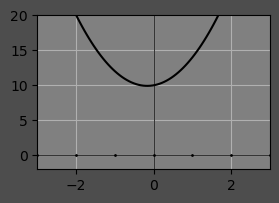

4*x**2 + x + 10


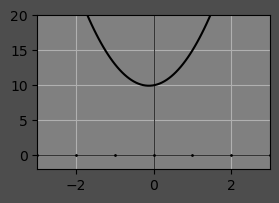

In [41]:
My_poly = [create_poly([10,1,i]) for i in range(5)]
for i in range(5):
    print('{}'.format(My_poly[i].show_func()))
    My_poly[i].show_curve(coords=[-3,3,-2,20])

In [42]:
f_ = Calculus([0,0,3])
%timeit f_.show_func()

63.3 ns ± 0.0223 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [43]:
f_.integrate()

x**3

In [44]:
valuetable = f_.value_table(-2,2,0.5)
valuetable.std()

4.107919181288746

In [45]:
f_.value_table2()

,x**3,3*x**2,6*x
-5,-125,75,-30
-4,-64,48,-24
-3,-27,27,-18
-2,-8,12,-12
-1,-1,3,-6
0,0,0,0
1,1,3,6
2,8,12,12
3,27,27,18
4,64,48,24


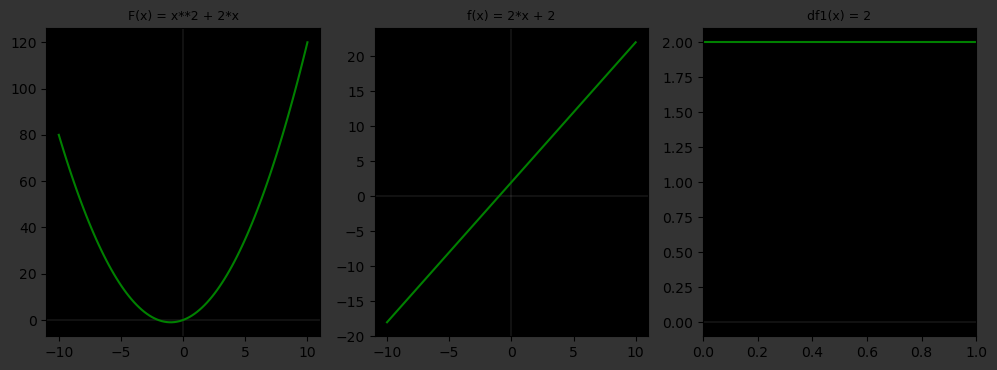

In [46]:
polypown([0,2,1])

In [47]:
f_.value_table()

-5    75
-4    48
-3    27
-2    12
-1     3
 0     0
 1     3
 2    12
 3    27
 4    48
dtype: int32

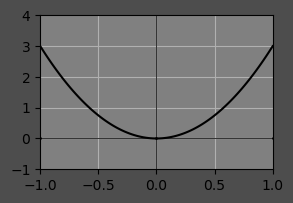

In [48]:
f_.show_curve([-1, 1, -1, 4])

In [49]:
%magic

In [50]:
%quickref

In [51]:
func2 = Calculus([0,0,1])
func2.value_table2(start=4,stop=6,step=.5)

,x**3/3,x**2,2*x
4.0,21.333333,16.00,8.0
4.5,30.375000,20.25,9.0
5.0,41.666667,25.00,10.0
5.5,55.458333,30.25,11.0


In [52]:


def polynomial(x):
    return 3 * x**2 + 2 * x + 1

my_func = lambda x: 3*x**2 + 2 * x + 1 

x = np.arange(-10, 10, 1, dtype=int)



gradient = np.gradient(my_func(x), x)


print(gradient)

[-55. -52. -46. -40. -34. -28. -22. -16. -10.  -4.   2.   8.  14.  20.
  26.  32.  38.  44.  50.  53.]


In [53]:

print(list(map(my_func, x)))

[281, 226, 177, 134, 97, 66, 41, 22, 9, 2, 1, 6, 17, 34, 57, 86, 121, 162, 209, 262]


In [54]:
226 - 281

-55